Creates figure with geotif in background and boxes for my subregion(s) and an inset map. <br><br>
To find colors, use this link: https://docs.generic-mapping-tools.org/6.2/gmtcolors.html <br><br>
Written 5-31-23
***

In [2]:
#Import pygmt
import pygmt

#Import any other modules you want to use
import numpy as np
import matplotlib.pyplot as plt

Define the boxes for frames, Jiang and Lohman study area, and my focus region and cropped region.

In [3]:
frame485=np.array(
    [[-114.607567, 32.71468], # got this info from OSL: /LagunaSalada/list.csv
     [-114.97776, 31.090954],
     [-117.601303, 31.496145],
     [-117.280273, 33.117657],
     [-114.607567, 32.71468]]
     )
frame480=np.array(
    [[-114.262985, 34.209965], # got this info from OSL: /LagunaSalada/list.csv 
     [-114.639206, 32.586636],
     [-117.306984, 32.989609],
     [-116.983658, 34.610931],
     [-114.262985, 34.209965]]
     )

JiangLohman=np.array(
    [[-116.2, 32.4], 
     [-116.2, 33.5], 
     [-115, 33.5],
     [-115, 32.4],
     [-116.2, 32.4]]
)
largeArea=np.array(
    [[-115.055677567246, 32.615454326997], 
     [-115.80872046165,32.7327620756761], 
     [-115.924182661749,32.2902303595692],
     [-115.155420271133,32.169824434697],
     [-115.055677567246,32.615454326997]]
)
smallArea=np.array(
    [[-115.007286694016,32.8360065284444], 
     [-115.43488213151,32.9030092005015], 
     [-115.48384819789,32.6828729687555],
     [-115.055653224566,32.6155786818662],
     [-115.007286694016,32.8360065284444]]
)
cropArea=np.array(
    [[-115.836432879008,32.6091356230372], 
     [-115.67545199537,32.5844209517118], 
     [-115.70451723996,32.4482959068315],
     [-115.869488060882,32.4736661354179],
     [-115.836432879008,32.6091356230372]]
)

Now make the plot.

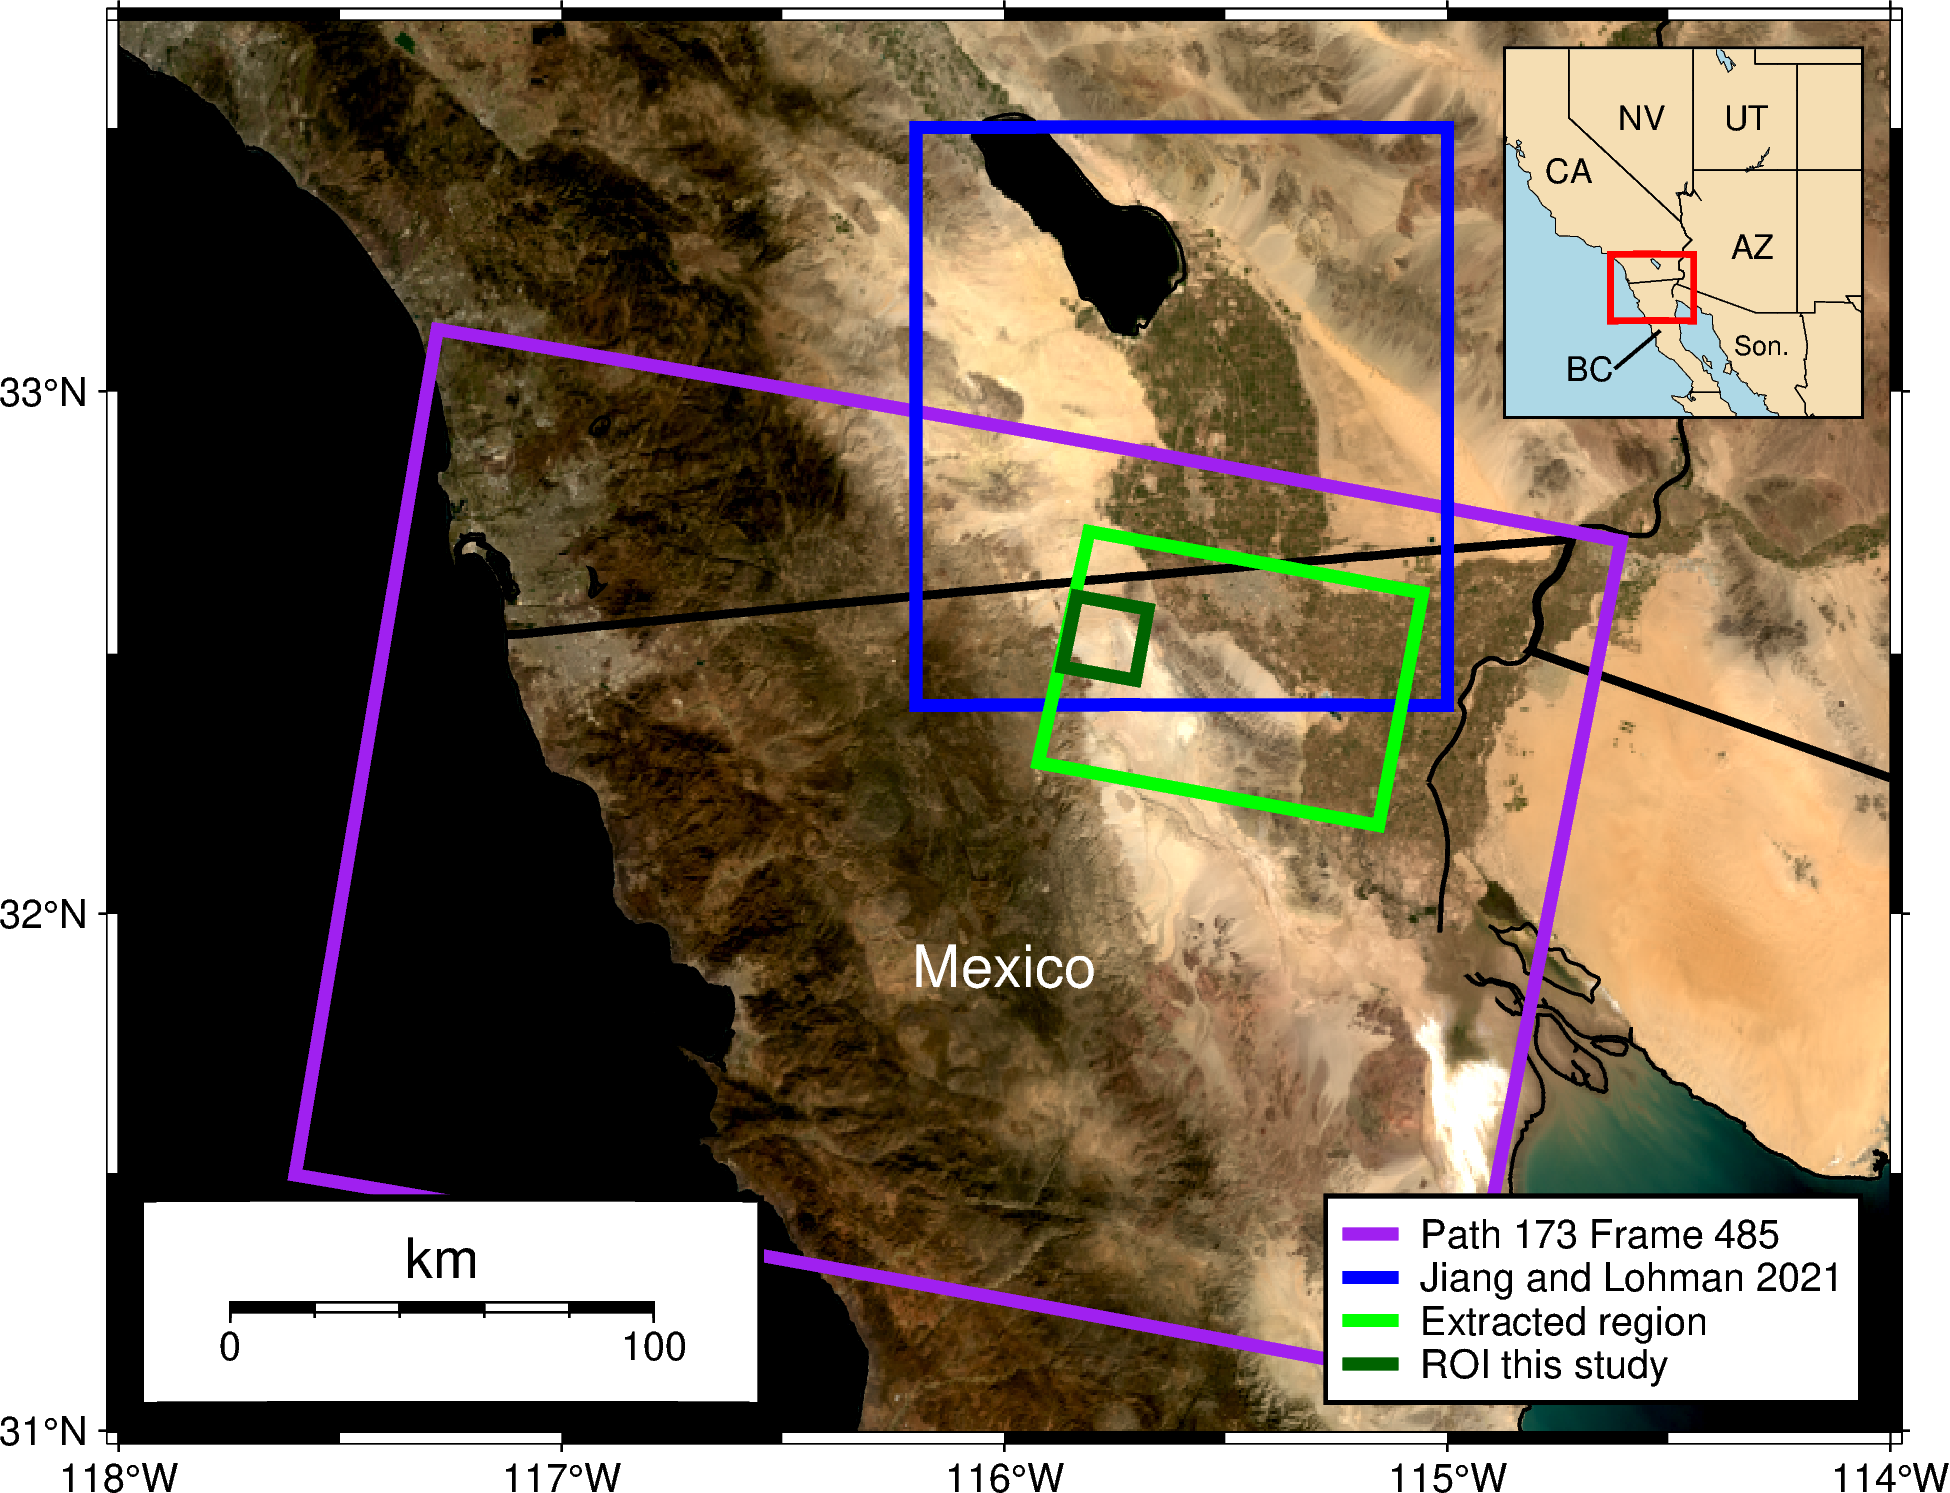

In [4]:
#create the region you want to plot on your map 
#region_plot=[-118,-113,30.9978192239,35.0028192239]
region_plot=[-118,-114,30.9978192239,33.7028192239] # cropped 
region_inset=[-123,-106,27,41.5]
proj = "M15c"
#create the pygmt figure 
fig = pygmt.Figure()
# load the geotiff I got from Google Earth Engine
grid = '/data/ocp4/LagunaSalada/Data_and_Figs/PyGMT/LS_Landsat.tif'
fig.grdimage(
    grid=grid,
    region=region_plot,
    projection=proj
    ) 
fig.coast(
    region=region_plot, 
    projection=proj,
    frame=["WSne", "xa1f0.5", "ya1f0.5"],
    # labels on West and South borders, not on north and east
    # a1- annotate every 1 degree 
    # f0.5- space the black/white bars by 0.5 degrees
    borders=["1/thickest,black", "2/thick,black"], # 1=country borders, 2=state borders, a=all
    shorelines='thin,black',
    # Use dcw to selectively highlight an area (country or state)
    #dcw="US.CA",#"US.CA+gred",
    )
#fig.coast(water="lightblue")# just for figuring out the scale bar 
#x and y are lon and lat coordinates, angle - can rotate font from horizontal
fig.text(text="California", x=-116.4, y=34.1, font="14p,white", angle=0)
fig.text(text="Mexico", x=-116, y=31.9, font="14p,white", angle=0)
fig.text(text="Arizona", x=-113.8, y=33.3, font="14p,white", angle=0)
fig.plot(x=frame485[:,0], y=frame485[:,1],pen="3p,purple",label="Path 173 Frame 485")
#fig.plot(x=frame480[:,0], y=frame480[:,1],pen="3p,brown",label="Path 173 Frame 480")
fig.plot(x=JiangLohman[:,0], y=JiangLohman[:,1],pen="3p,blue",label="Jiang and Lohman 2021")
fig.plot(x=largeArea[:,0], y=largeArea[:,1],pen="3p,green",label="Extracted region, this study")
#fig.plot(x=smallArea[:,0], y=smallArea[:,1],pen="3p,green",label="ROI this study")
fig.plot(x=cropArea[:,0], y=cropArea[:,1],pen="3p,darkgreen",label="ROI this study")
# put a white box behind the scale bar since the box= option isn't working below.
scale_rect = [[-117.95, 31.05, -116.55, 31.45]]    
#scale_rect = [[-117, 32, -116, 33]]   
fig.plot(data=scale_rect, style="r+s", pen="1.5p,black", fill="white") 
# add the scale bar so it goes on top of frame box
fig.basemap(
    map_scale=["f-117.27/31.25/20/100+lkm"], # +u adds units to the numbers, +lkm adds title to scale bar of "km"
    box="+gwhite+p1p" # NOT WORKING 
)
#fig.basemap(frame=["+tMap"]) to add title 
with fig.inset(
    position="jTR+o0.25c/0.25c", 
    # j (lower case) = within map area, upper case = outside map area, TR=Top Right,
    # +w3c/3.1c - width/height of map, +o0.25c/0.25c is the offset from x and y corner position, box="+pblack" - adds black outline around map
    box="+pblack",
    region=region_inset,
    projection="M3c"
    ): 
    fig.coast(
        land="wheat",
        borders=["a"], # add all state borders
        water="lightblue",
        shorelines="0.1p",
        area_thresh=500
        )
    fig.text(text="NV", x=-116.5, y=39)
    fig.text(text="UT", x=-111.5, y=39)
    fig.text(text="CA", x=-120, y=37)
    fig.text(text="AZ", x=-111.2, y=34)
    fig.text(text="Son.", x=-110.75, y=30, font="6.5p")
    fig.text(text="BC", x=-119, y=29)
    fig.plot(x=-117.8, y=29, style="v0c", pen="0.8p", direction=[[40], [0.5]]) #[angle in degrees],[length]
    rectangle = [[region_plot[0], region_plot[2], region_plot[1], region_plot[3]]]    
    fig.plot(data=rectangle, style="r+s", pen="1.5p,red")    
    # r- rectangle 
    # "+s" means that the first two columns are the longitude and latitude of the bottom left corner of the rectangle, 
    # and the last two columns the longitude and latitude of the uppper right corner.
#plot the legend in position you want and add white box around it
fig.legend(position="jBR+o0.25/0.25c",box="+gwhite+p1p")
fig.savefig("/data/ocp4/LagunaSalada/Data_and_Figs/PyGMT/Figure1.png")
fig.show()

In [5]:
# load a DEM
region_plot=[-116,-115,32.1,32.9]
dem = pygmt.datasets.load_earth_relief(resolution="03s",region=region_plot)

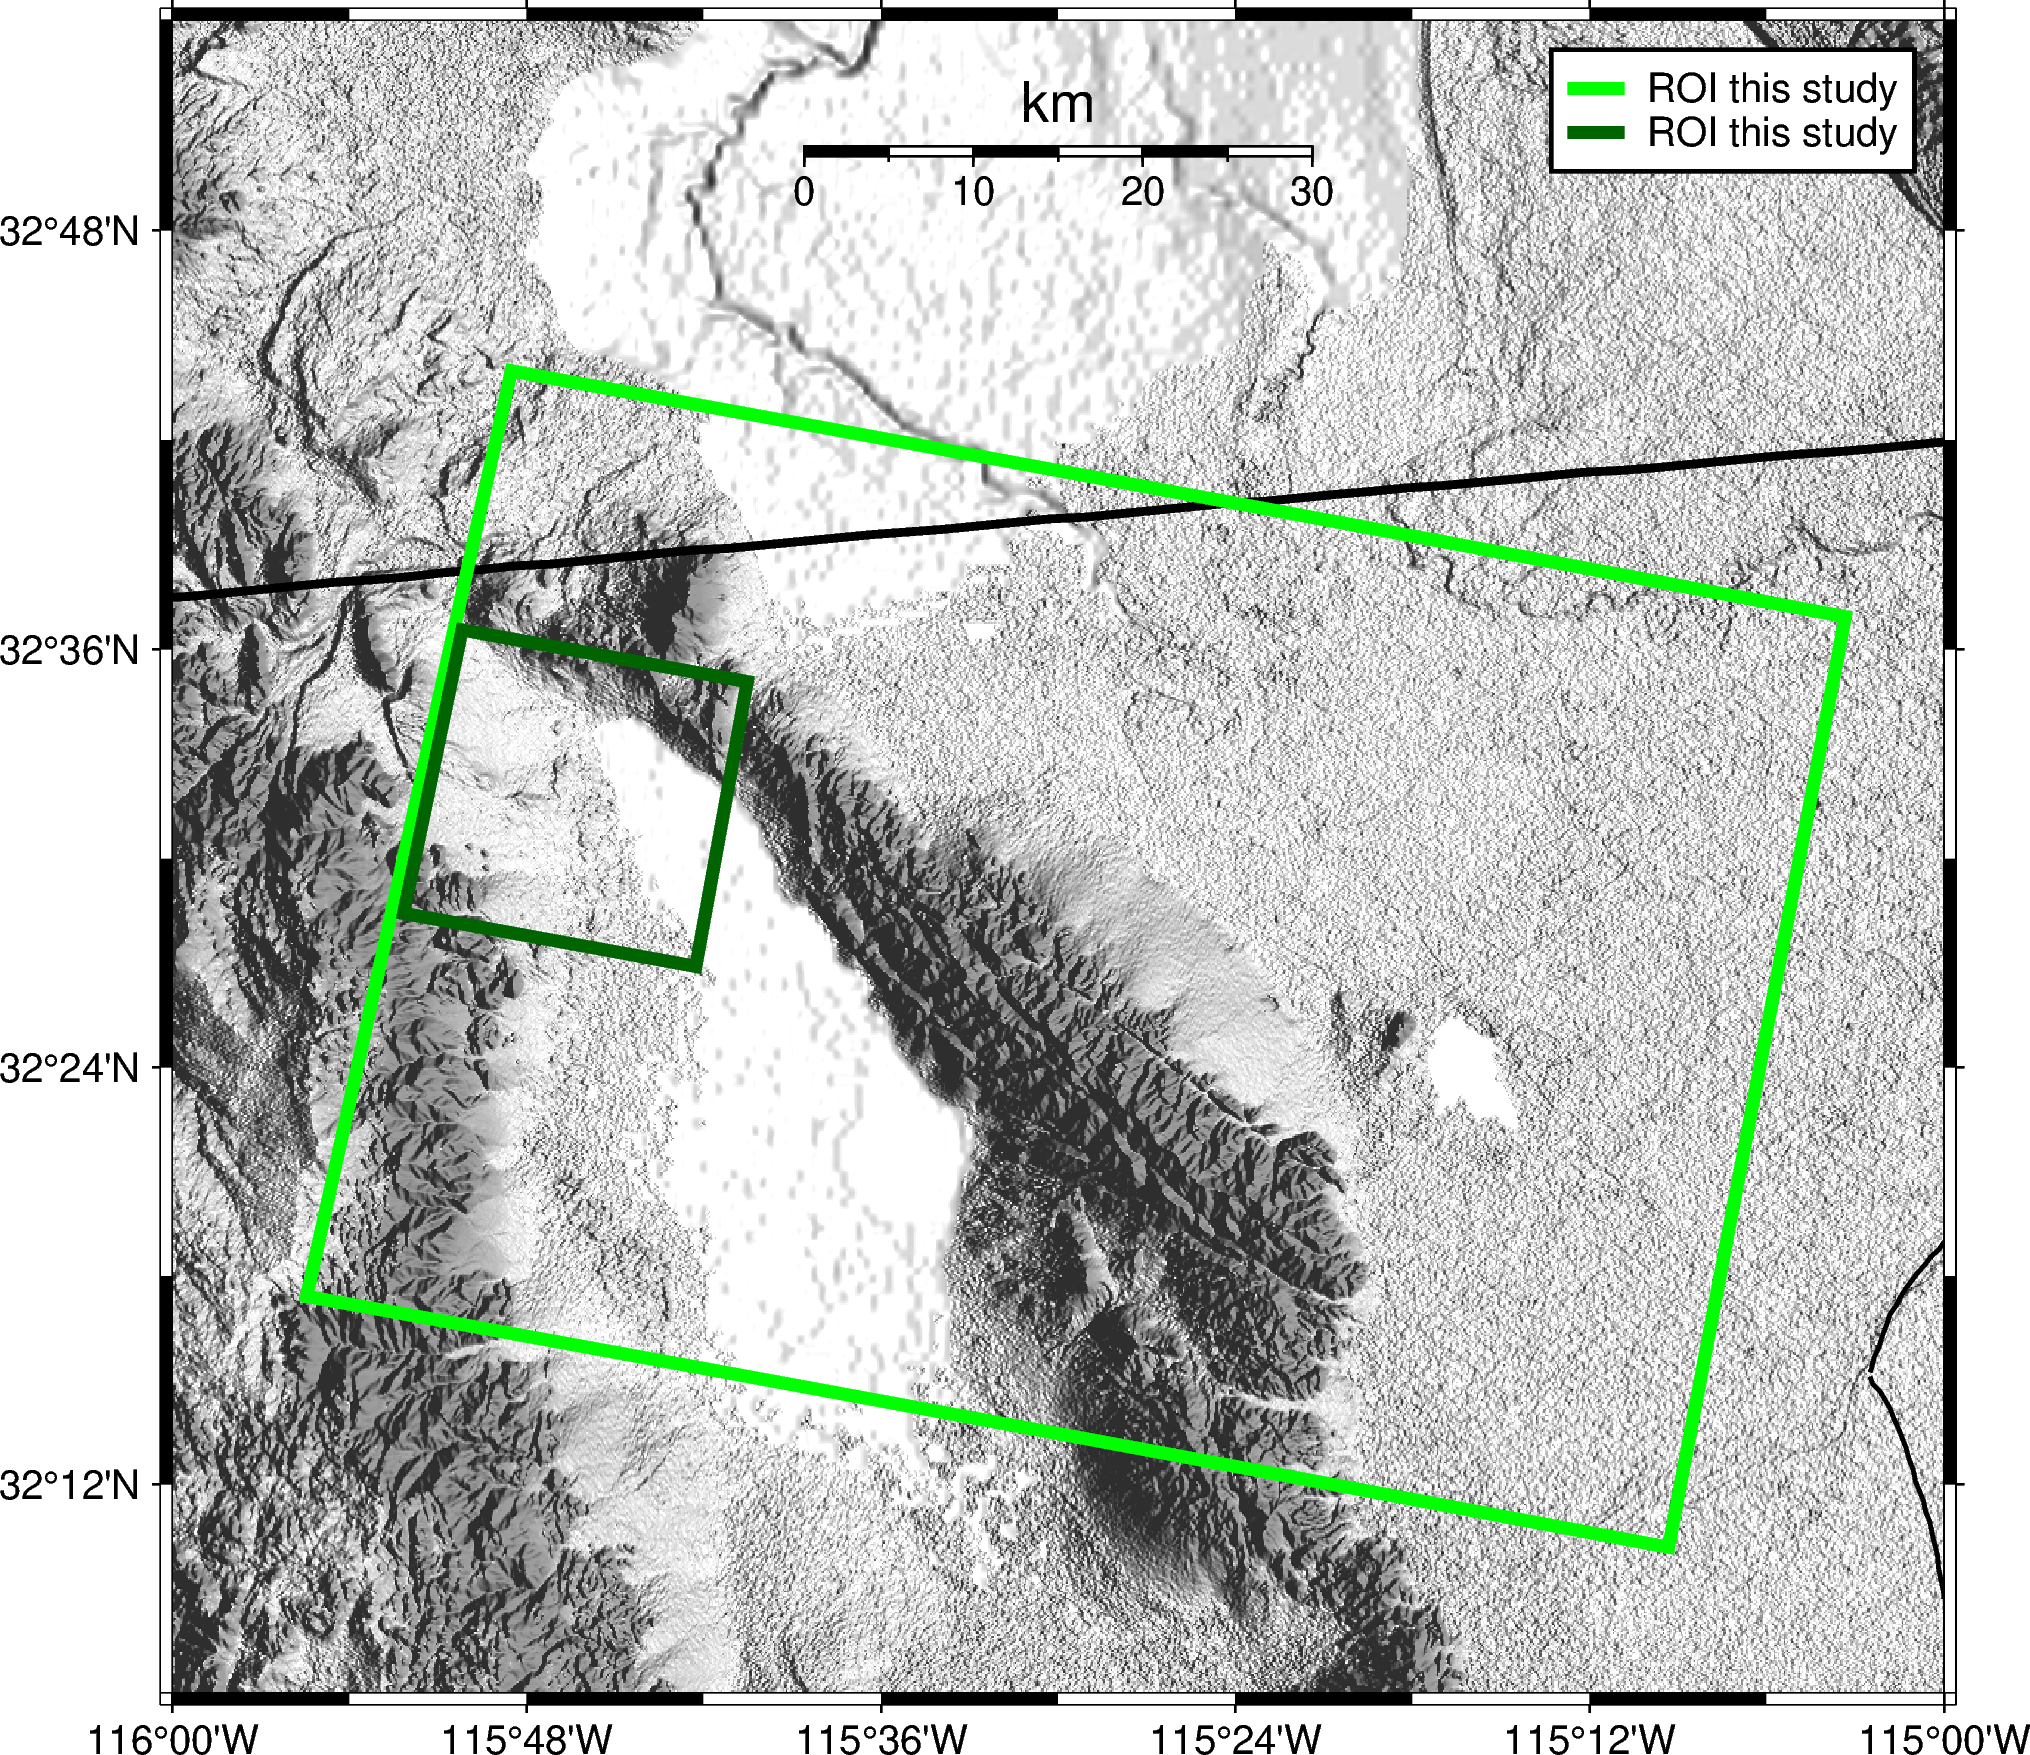

In [6]:
proj = "M15c"
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain") # NOT WORKING

# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=dem, radiance=[90, 30])

fig = pygmt.Figure()
pygmt.makecpt(cmap="gray", series=[-1.2, 0.2, 0.01], continuous=True)
fig.grdimage(
    region=region_plot,
    grid=dgrid,
    projection=proj,
    frame=["WSne", "xa0.2f0.1", "ya0.2f0.1"],
    cmap=True,
    #shading="+a45+nt0.5" # not sure how this works, didn't change anything.
)
fig.basemap(
    map_scale=["f-115.5/32.84/20/30+lkm"],
    box="+gwhite+p1p" # NOT WORKING 
)
fig.coast(
    borders=["1/thickest,black", "2/thick,black"], # 1=country borders, 2=state borders
)
# load the geotiff I geocoded from an interferogram
# igram_file = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/unfilt_unwrapped/20170510_20170522_unfilt_geocoded.tif'
# fig.grdimage(
#     grid=igram_file,
#     region=region_plot,
#     projection=proj
#     ) 

#fig.text(text="California", x=-116.4, y=34.1, font="14p,white", angle=0)
#fig.text(text="Mexico", x=-116, y=31.9, font="14p,white", angle=0)
fig.plot(x=largeArea[:,0], y=largeArea[:,1],pen="3p,green",label="ROI this study")
fig.plot(x=cropArea[:,0], y=cropArea[:,1],pen="3p,darkgreen",label="ROI this study")
fig.legend(position="jTR+o0.25/0.25c",box="+gwhite+p1p")
fig.savefig("/data/ocp4/LagunaSalada/Data_and_Figs/PyGMT/Figure2.png")
fig.show()

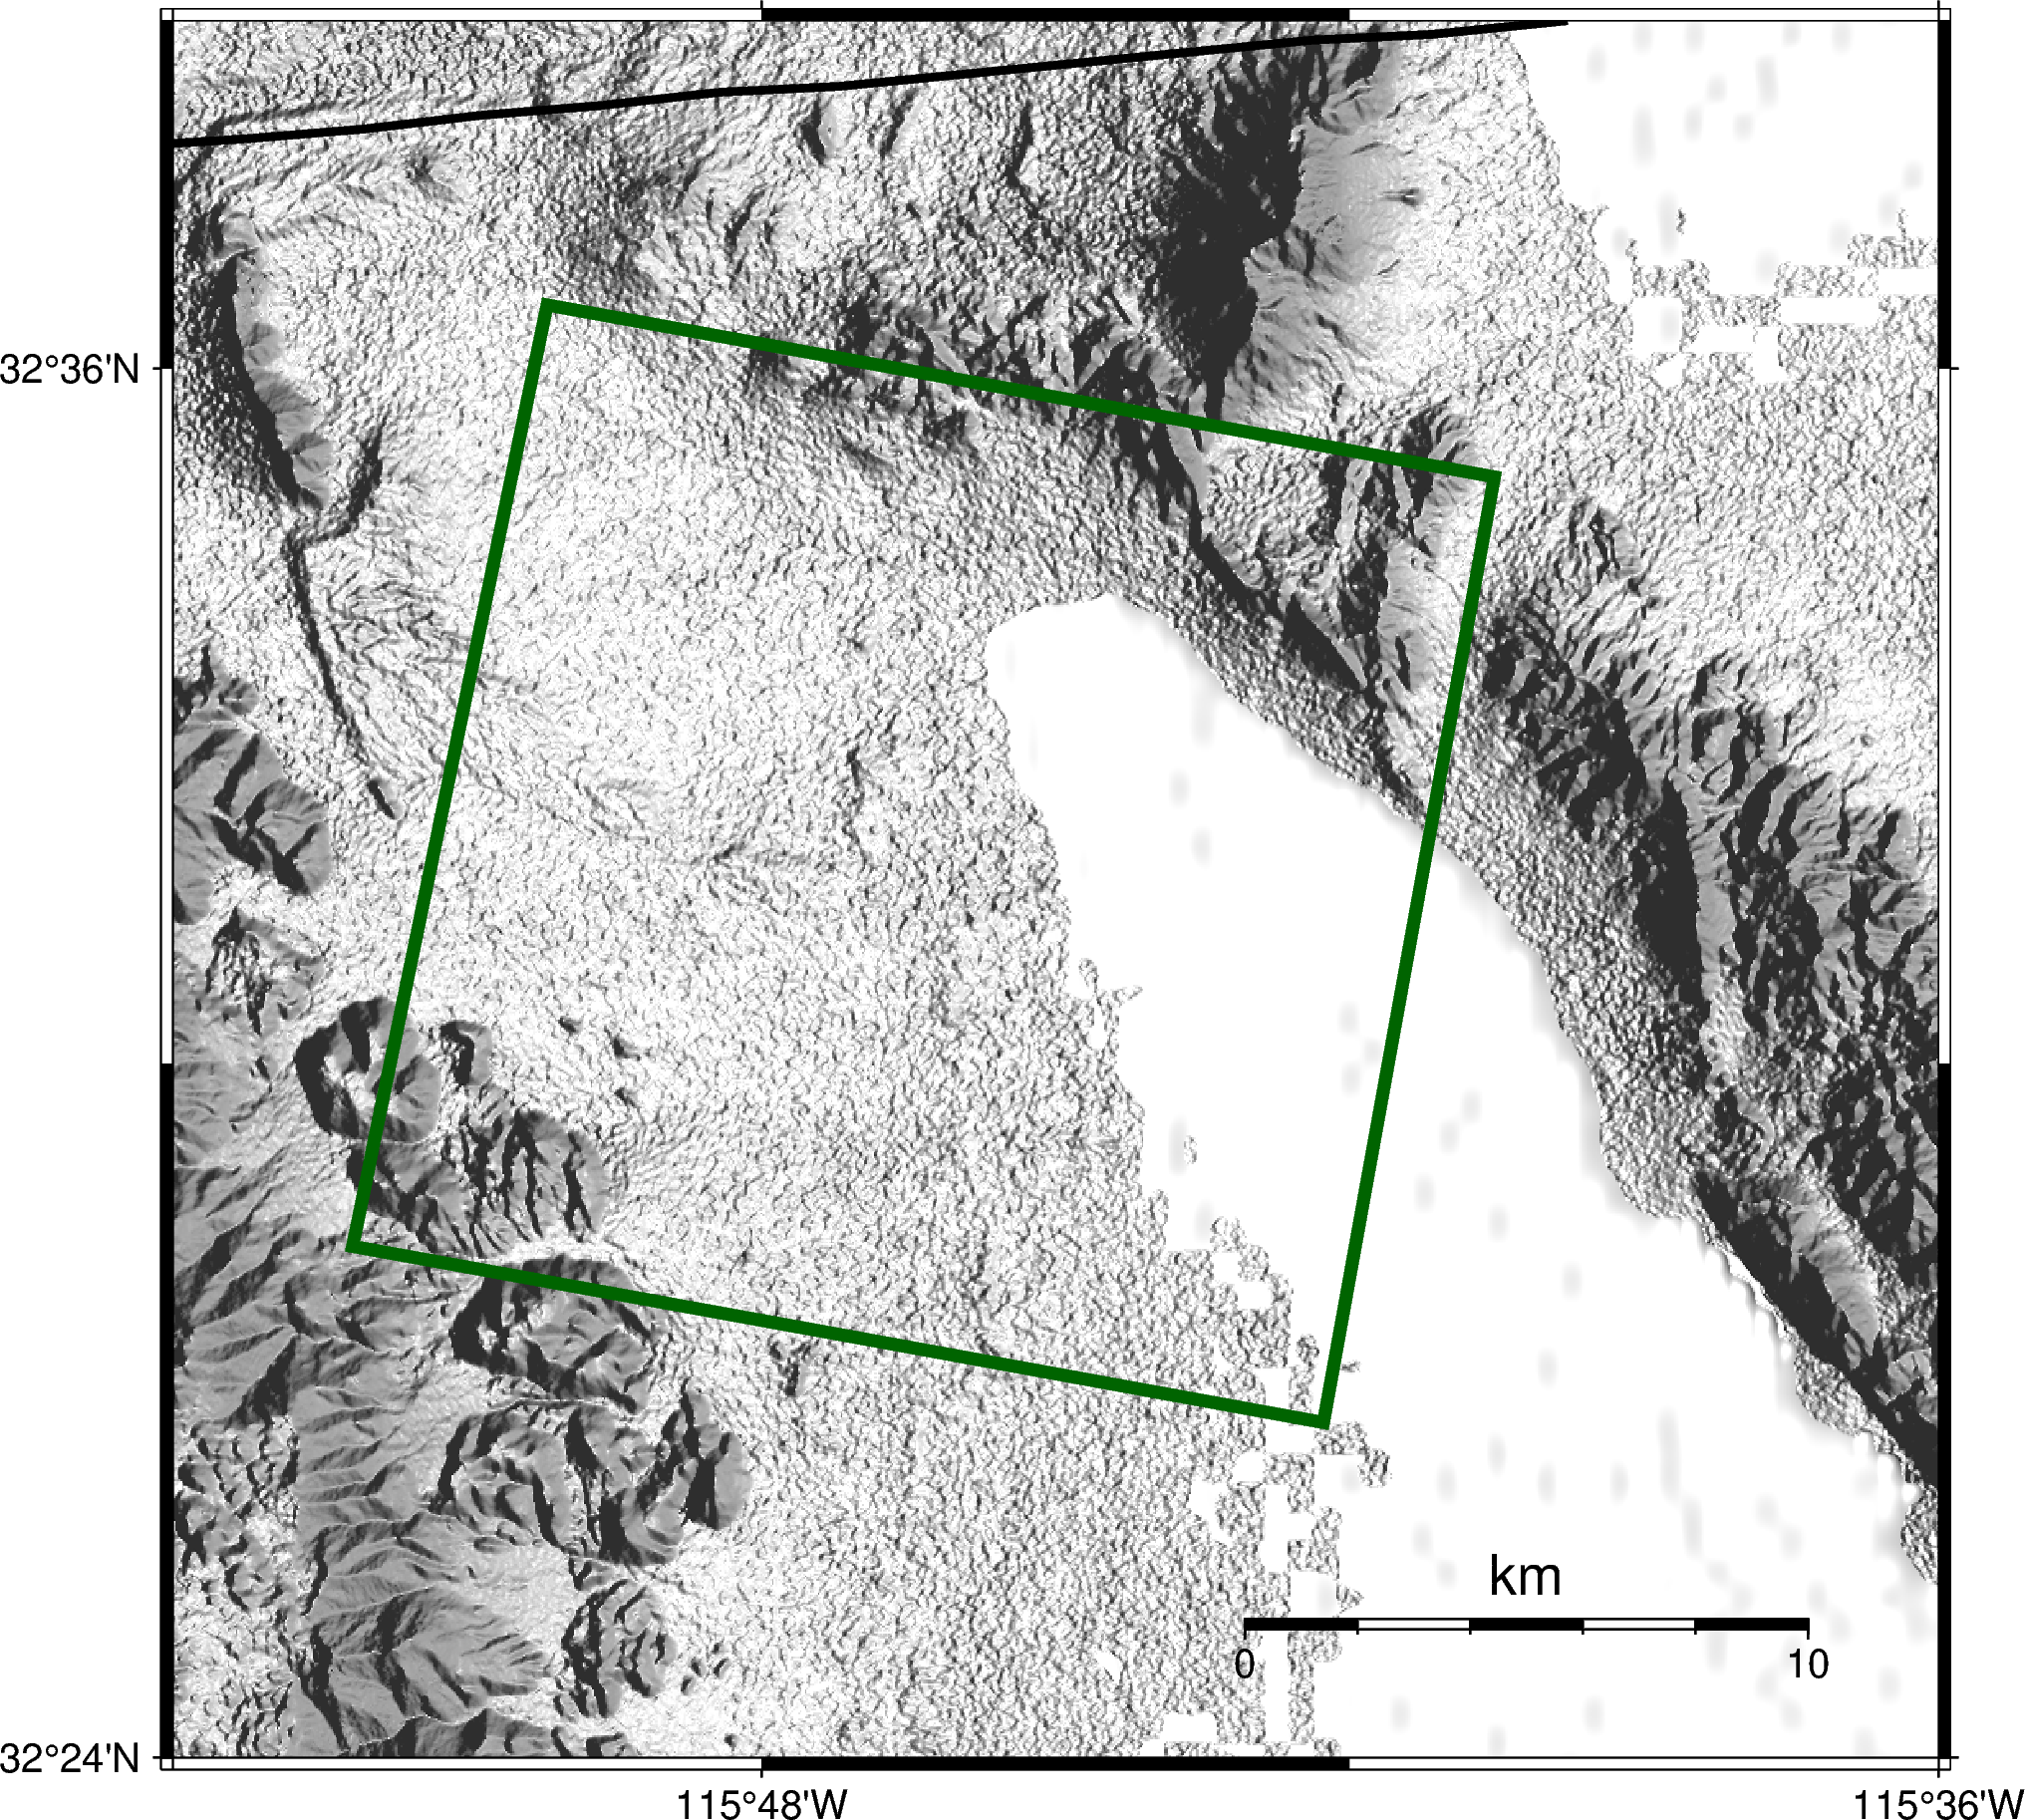

In [7]:
region_plot=[-115.9,-115.6,32.4,32.65]
dem = pygmt.datasets.load_earth_relief(resolution="01s",region=region_plot)
proj = "M15c"
pygmt.config(FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain") # NOT WORKING
# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
dgrid = pygmt.grdgradient(grid=dem, radiance=[90, 30])
fig = pygmt.Figure()
pygmt.makecpt(cmap="gray", series=[-1.2, 0.2, 0.01], continuous=True)
fig.grdimage(
    region=region_plot,
    grid=dgrid,
    projection=proj,
    frame=["WSne", "xa0.2f0.1", "ya0.2f0.1"],
    cmap=True,
    #shading="+a45+nt0.5" # not sure how this works, didn't change anything.
)
fig.basemap(
    map_scale=["f-115.67/32.42/20/10+lkm"],
    box="+gwhite+p1p" # NOT WORKING 
)
fig.coast(
    borders=["1/thickest,black", "2/thick,black"], # 1=country borders, 2=state borders
)
fig.plot(x=cropArea[:,0], y=cropArea[:,1],pen="3p,darkgreen",label="ROI this study")
#fig.legend(position="jTR+o0.25/0.25c",box="+gwhite+p1p") 
fig.savefig("/data/ocp4/LagunaSalada/Data_and_Figs/PyGMT/Figure3.png")
fig.show()

# space for a colorbar over to the right if I'm plotting a sample interferogram on top.

https://forum.generic-mapping-tools.org/t/gmt-example-18-with-pygmt-volumes-and-spatial-selections/1585 